# COVID 19 Deaths Analysis

In This project we go over the trends and analyze the Covid 19 dataset.

### 1. Loading and Exploring the Dataset

In [172]:
#Importing the necessary modules for data analyis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [173]:
#Loading the csv file
#parse_dates to convert the date column to date datetime objects
covid = pd.read_csv("Covid_Dataset.csv",parse_dates=['date'])

#Checking the first 5 rows
covid.head(5) 

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


In [174]:
# Checking the count of the columns and rows
covid.shape

(113879, 61)

In [175]:
# Checking all the columns
covid.columns

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [176]:
# Getting only the columns that are needed for our data analysis
covid_subset = covid[[
       'country', 'date', 'total_cases', 'new_cases',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths', 'new_deaths', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_vaccinations',
       'people_vaccinated','total_vaccinations_per_hundred',
       'code', 'continent','population'
]]

In [177]:
# Checking missing values count
covid_subset.isna().sum()

country                               0
date                                  0
total_cases                        1484
new_cases                          1497
total_cases_per_million            1484
new_cases_per_million              1497
total_deaths                       1484
new_deaths                         1494
total_deaths_per_million           1484
new_deaths_per_million             1494
total_vaccinations                95114
people_vaccinated                 97694
total_vaccinations_per_hundred    95114
code                               2075
continent                          6223
population                         2075
dtype: int64

In [178]:
#Checking the datatypes of the columns
covid_subset.dtypes

country                                   object
date                              datetime64[ns]
total_cases                              float64
new_cases                                float64
total_cases_per_million                  float64
new_cases_per_million                    float64
total_deaths                             float64
new_deaths                               float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
total_vaccinations                       float64
people_vaccinated                        float64
total_vaccinations_per_hundred           float64
code                                      object
continent                                 object
population                               float64
dtype: object

In [179]:
# Checking the descriptive statistics as there are many numerical values
covid_subset.describe()

,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,population
count,113879,1.123950e+05,1.123820e+05,112395.000000,112382.000000,1.123950e+05,112385.000000,112395.000000,112385.000000,1.876500e+04,1.618500e+04,18765.000000,1.118040e+05
mean,2022-10-29 18:20:42.560963584,8.097282e+06,6.400570e+03,121305.519931,91.147835,6.664233e+04,43.786395,985.947175,0.658459,6.563327e+08,2.993864e+08,128.597054,1.585004e+08
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.420200e+04
25%,2021-05-26 00:00:00,9.106000e+03,0.000000e+00,3037.639200,0.000000,8.400000e+01,0.000000,32.310177,0.000000,1.787387e+06,7.331490e+05,47.486060,4.027410e+05
50%,2022-10-25 00:00:00,7.143000e+04,0.000000e+00,63801.445000,0.000000,7.720000e+02,0.000000,455.297800,0.000000,1.828174e+07,8.737060e+06,120.936560,6.035104e+06
75%,2024-04-02 00:00:00,9.940370e+05,6.400000e+01,175187.030000,8.424857,1.302450e+04,0.000000,1645.535500,0.000000,1.019011e+08,4.125734e+07,208.941620,2.620099e+07
max,2025-12-31 00:00:00,3.021686e+08,7.213802e+06,769806.800000,36330.008000,1.637891e+06,55431.000000,5679.282700,585.433500,9.180668e+09,3.699988e+09,415.881440,4.746330e+09
std,NaN,3.695015e+07,9.038272e+04,160768.492842,614.021687,2.548282e+05,361.453785,1236.891532,4.352947,1.996905e+09,8.850006e+08,95.263001,6.862927e+08


In [180]:
# Asia listed as country even though it is not
covid_subset.sort_values(by = 'population', ascending = False)

,country,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,code,continent,population
26491,Asia,2024-04-06,301397747.0,914.0,63926.703,0.193860,1636859.0,4.0,347.17910,0.000848,9.180612e+09,3.699985e+09,194.48833,OWID_ASI,NaN,4.746330e+09
26298,Asia,2023-09-26,300629744.0,203.0,63763.810,0.043056,1633555.0,3.0,346.47833,0.000636,9.155899e+09,3.697913e+09,193.96481,OWID_ASI,NaN,4.746330e+09
26328,Asia,2023-10-26,300724067.0,477.0,63783.816,0.101172,1635187.0,1.0,346.82446,0.000212,9.164294e+09,3.698530e+09,194.14265,OWID_ASI,NaN,4.746330e+09
26327,Asia,2023-10-25,300723590.0,154.0,63783.715,0.032664,1635186.0,2.0,346.82425,0.000424,9.164057e+09,3.698507e+09,194.13762,OWID_ASI,NaN,4.746330e+09
26326,Asia,2023-10-24,300723436.0,115.0,63783.684,0.024392,1635184.0,3.0,346.82385,0.000636,9.163819e+09,3.698484e+09,194.13258,OWID_ASI,NaN,4.746330e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29081,Asia excl. China,2025-09-04,202778164.0,3.0,61642.950,0.000912,1515484.0,0.0,460.69507,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
29082,Asia excl. China,2025-09-05,202778164.0,0.0,61642.950,0.000000,1515484.0,0.0,460.69507,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
29083,Asia excl. China,2025-09-06,202786869.0,8705.0,61645.594,2.646251,1515493.0,9.0,460.69780,0.002736,NaN,NaN,NaN,NaN,NaN,NaN
29084,Asia excl. China,2025-09-07,202786886.0,17.0,61645.600,0.005168,1515493.0,0.0,460.69780,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# Checking what other continents are there
covid_subset["country"].value_counts()

country
Bulgaria                           2093
Canada                             2093
Austria                            2093
Australia                          2093
Chile                              2093
Croatia                            2093
Belgium                            2093
Colombia                           2093
Belarus                            2081
Bermuda                            2081
Cape Verde                         2081
Bhutan                             2081
Bolivia                            2081
Bosnia and Herzegovina             2081
Brazil                             2081
Brunei                             2081
Barbados                           2081
Belize                             2081
Cuba                               2081
Argentina                          2081
Albania                            2081
Algeria                            2081
Andorra                            2081
Bahamas                            2081
Aruba                           

In [182]:
# Continents listed as countries hava NAN values in the continent column
asia = covid_subset[covid_subset["country"] == "Asia"]
asia

,country,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,code,continent,population
24937,Asia,2020-01-04,1.0,1.0,0.000212,0.000212,0.0,0.0,0.0000,0.000000,NaN,NaN,NaN,OWID_ASI,NaN,4.746330e+09
24938,Asia,2020-01-05,1.0,0.0,0.000212,0.000000,0.0,0.0,0.0000,0.000000,NaN,NaN,NaN,OWID_ASI,NaN,4.746330e+09
24939,Asia,2020-01-06,4.0,3.0,0.000848,0.000636,0.0,0.0,0.0000,0.000000,NaN,NaN,NaN,OWID_ASI,NaN,4.746330e+09
24940,Asia,2020-01-07,4.0,0.0,0.000848,0.000000,0.0,0.0,0.0000,0.000000,NaN,NaN,NaN,OWID_ASI,NaN,4.746330e+09
24941,Asia,2020-01-08,4.0,0.0,0.000848,0.000000,0.0,0.0,0.0000,0.000000,NaN,NaN,NaN,OWID_ASI,NaN,4.746330e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27006,Asia,2025-09-03,302159922.0,2.0,64088.363000,0.000424,1637882.0,0.0,347.3961,0.000000,NaN,NaN,NaN,OWID_ASI,NaN,4.746330e+09
27007,Asia,2025-09-04,302159925.0,3.0,64088.363000,0.000636,1637882.0,0.0,347.3961,0.000000,NaN,NaN,NaN,OWID_ASI,NaN,4.746330e+09
27008,Asia,2025-09-05,302159925.0,0.0,64088.363000,0.000000,1637882.0,0.0,347.3961,0.000000,NaN,NaN,NaN,OWID_ASI,NaN,4.746330e+09
27009,Asia,2025-09-06,302168630.0,8705.0,64090.207000,1.846337,1637891.0,9.0,347.3980,0.001909,NaN,NaN,NaN,OWID_ASI,NaN,4.746330e+09


### 2. Cleaning the Data

In [183]:
# Checking for duplicate data
covid_subset.duplicated().sum()

0

In [184]:
# Dealing with the continents listed as countries
invalid_countries = [
    'World', 'Asia', 'Europe', 'Africa', 'North America', 
    'South America', 'Oceania', 'European Union', 'International'
]

covid_subset = covid_subset[~covid_subset['country'].isin(invalid_countries)]
covid_subset = covid_subset[covid_subset['continent'].notna()]  # removes rows with no continent

In [185]:
# Checking the missing values left
covid_subset.isna().sum()

country                               0
date                                  0
total_cases                        1484
new_cases                          1497
total_cases_per_million            1484
new_cases_per_million              1497
total_deaths                       1484
new_deaths                         1494
total_deaths_per_million           1484
new_deaths_per_million             1494
total_vaccinations                91591
people_vaccinated                 94171
total_vaccinations_per_hundred    91591
code                                  0
continent                             0
population                            0
dtype: int64

In [186]:
# Using ffill for the missing values in cumulative columns because it assumes the most recent value as approximation.
cumulative_columns = [
    'total_cases', 'total_cases_per_million', 'total_deaths', 
    'total_deaths_per_million', 'total_vaccinations', 
    'people_vaccinated', 'total_vaccinations_per_hundred'
]

# Apply ffill to the cumulative columns according to the country so it does not mix up between the countries values
covid_subset[cumulative_columns] = (
    covid_subset
    .sort_values(['country', 'date'])
    .groupby('country')[cumulative_columns]
    .ffill()
)


In [187]:
# Using interpolate for the missing values in the daily update columns because it replaces the missing values by estimation from the other near data points.
daily_columns = [
    'new_cases', 'new_cases_per_million', 'new_deaths', 'new_deaths_per_million'
]

covid_subset[daily_columns] = covid_subset[daily_columns].interpolate(method='linear')

In [188]:
# Checking the missing values left
covid_subset.isna().sum()

country                               0
date                                  0
total_cases                        1272
new_cases                             3
total_cases_per_million            1272
new_cases_per_million                 3
total_deaths                       1272
new_deaths                            3
total_deaths_per_million           1272
new_deaths_per_million                3
total_vaccinations                24077
people_vaccinated                 24259
total_vaccinations_per_hundred    24077
code                                  0
continent                             0
population                            0
dtype: int64

In [189]:
# Replacing the remaining values with 0 as they didn't have reference point in the first place for ffill
# Also for the vaccinations, the error is caused because recorded data is before the vaccination program began for all the countries
covid_subset[cumulative_columns] = covid_subset[cumulative_columns].fillna(0)
covid_subset[daily_columns] = covid_subset[daily_columns].fillna(0)

In [190]:
# Checking the missing values left
covid_subset.isna().sum()

country                           0
date                              0
total_cases                       0
new_cases                         0
total_cases_per_million           0
new_cases_per_million             0
total_deaths                      0
new_deaths                        0
total_deaths_per_million          0
new_deaths_per_million            0
total_vaccinations                0
people_vaccinated                 0
total_vaccinations_per_hundred    0
code                              0
continent                         0
population                        0
dtype: int64

In [191]:
# Checking some logical errors that could be in the dataset caused by ffills and other data inputting errors
# Checking whether total death exceeds total cases in a row
(covid_subset['total_deaths'] > covid_subset['total_cases']).any()  # should be False

True

In [192]:
# Checking whether total cases exceeds population in a row
(covid_subset['total_cases'] > covid_subset['population']).any()    # should be False

False

In [193]:
# Dealing with the error of total deaths exceeding total cases
covid_subset = covid_subset[covid_subset['total_deaths'] <= covid_subset['total_cases']]

In [194]:
# Checking the logical issue, we need it to be false for it to be correct
(covid_subset['total_deaths'] > covid_subset['total_cases']).any()

False

In [195]:
# Fixing the other columns that are intermingled with the total deaths, total cases and population.
covid_subset['total_cases_per_million'] = covid_subset['total_cases'] / covid_subset['population'] * 1e6
covid_subset['total_deaths_per_million'] = covid_subset['total_deaths'] / covid_subset['population'] * 1e6
covid_subset['total_vaccinations_per_hundred'] = covid_subset['total_vaccinations'] / covid_subset['population'] * 100

In [196]:
# Final check to make sure the data cleaning process is successful
print("Duplicates:", covid_subset.duplicated().sum())
print("Missing values:\n", covid_subset.isna().sum().sum())
print("Deaths > Cases:", (covid_subset['total_deaths'] > covid_subset['total_cases']).any())
print("Cases > Population:", (covid_subset['total_cases'] > covid_subset['population']).any())
print("Negative values:", (covid_subset[['total_cases','total_deaths','total_vaccinations']] < 0).sum().sum())


Duplicates: 0
Missing values:
 0
Deaths > Cases: False
Cases > Population: False
Negative values: 0


### 3. Visualization of Data

#### A. Total Global Covid cases over Time

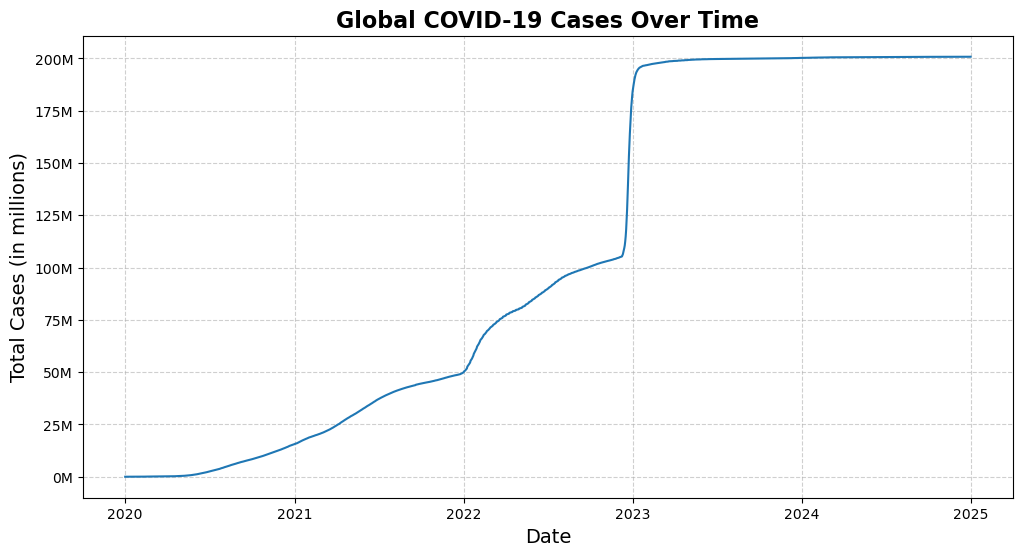

In [197]:
# Using groupby to create a dataframe that is to be used in the visualization of total cases over time
global_cases = covid_subset.groupby('date')['total_cases'].sum().reset_index()
global_cases = global_cases[global_cases['date'] < '2025-01-01'] # Cases up till 2025

# Plot the line graph
plt.figure(figsize=(12,6))
graph = sns.lineplot(x = 'date', y = 'total_cases', data = global_cases)

# Creating a custom formatter function
def millions_formatter(x, pos):
    # Formatting the number of cases to make it more readable in the graph
    return f'{x / 1e6:1.0f}M'

# Applying the custom formatter to the y-axis
formatter = ticker.FuncFormatter(millions_formatter)
graph.yaxis.set_major_formatter(formatter)

#Labeling the graph
plt.title("Global COVID-19 Cases Over Time", fontsize=16, fontweight = 'bold')
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Total Cases (in millions)", fontsize = 14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### B. People vaccinated vs Total cases for top 5 Countries

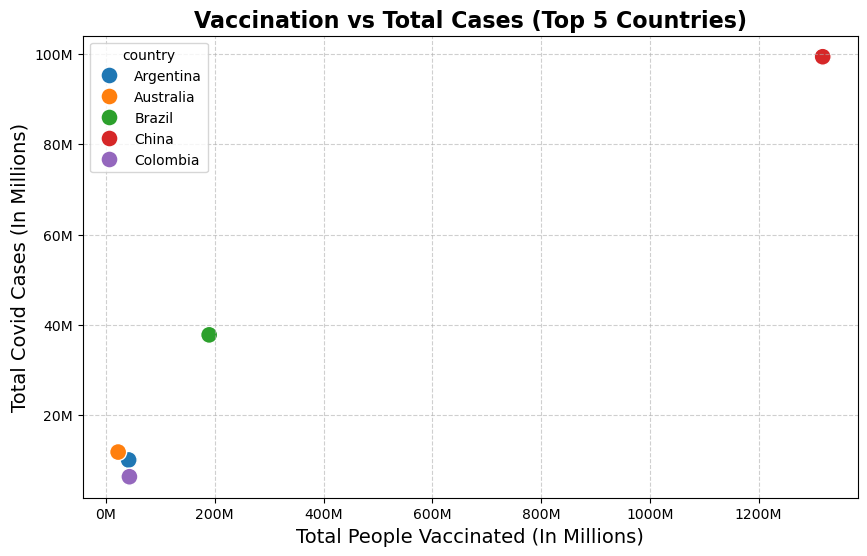

In [198]:
# Creating a dataframe for the top 5 countries with the most cases recorded
top5 = covid_subset.groupby('country')['total_cases'].max().nlargest(5).index
top5_cases = covid_subset[covid_subset['country'].isin(top5)]

# Storing the data in a new dataframe so that the latest entry of the countries are stored
latest_entry = top5_cases.groupby('country').last().reset_index()

# Plotting the scatter plot
fig, graph = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=latest_entry,
    x='people_vaccinated',
    y='total_cases',
    hue='country',
    s=150
)

# Defining a custom function to format the labels in millions to make it more readable in the graph
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Creating a formatter instance for the custom function
format_to_millions = ticker.FuncFormatter(millions_formatter)

# Apply the million formatter to both axes
graph.xaxis.set_major_formatter(format_to_millions)
graph.yaxis.set_major_formatter(format_to_millions)

# Labeling the graph
plt.title("Vaccination vs Total Cases (Top 5 Countries)", fontsize = 16, fontweight = 'bold')
plt.xlabel("Total People Vaccinated (In Millions)", fontsize = 14)
plt.ylabel("Total Covid Cases (In Millions)", fontsize = 14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
